# 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등함수(identity function)은 입력을 그대로 출력하는 함수이다.<br>
그림으로 표현하면
<img src="images/3_21.png" height="100px" width="300px">
이와 같다.

한편, 분류에서 사용하는 소프트맥스 함수(softmax function)의 식은 다음과 같다.

$
y_k =
\frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
\qquad$ [식 3.10]

소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.

이 소프트맥스 함수를 그림으로 나타내면 다음과 같다.
<img src="images/3_22.png" height="100px" width="300px">
그래프를 그려보면 이와 같다. ReLU 함수가 부드러워진 것과 같다.

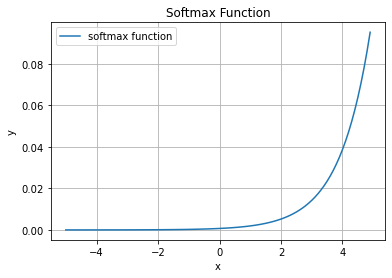

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    
    y = np.exp(x) / np.sum(np.exp(x))
    
    return y

x = np.arange(-5, 5, 0.1)
y = softmax(x)

plt.plot(x, y, label="softmax function")
plt.title("Softmax Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# 3.5.2 소프트맥스 함수 구현 시 주의점

현재 그래프에서 확인할 수 있듯이 소프트맥스는 지수함수를 사용하기 때문에 그 값이 매우 커지게 되는 오버플로 문제가 발생할 수 있다.

이러한 문제를 해결하도록 소프트맥스 함수 구현을 개선해 보자.

$
y_k = 
\frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} =
\frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)}
$

$
\qquad \qquad \qquad \! = 
\frac{exp(a_k + \ln C)}{\sum_{i=1}^n exp(a_i + \ln C)}
$

$
\qquad \qquad \qquad \! =
\frac{exp(a_k + C')}{\sum_{i=1}^n exp(a_i + C')}
\qquad$ [식 3.11]

이 [식 3.11]이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하여도, 결과는 바뀌지 않는 다는 것을 말해준다. 여기서 $C'$의 값은 어떤 것을 대입하여도 괜찮지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.<br>
구체적인 예시를 들어보자.

In [6]:
a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)

a = a - np.max(a)
y = softmax(a)
print(y)

[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/home/dg/anaconda3/envs/M_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/dg/anaconda3/envs/M_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


위에 오버플로 오류가 난것을 확인할 수 있다.<br>
위의 소프트맥스 함수에서 오버플로 문제를 해결해 주면, 새로운 소프트맥스 함수는 다음과 같다.

In [7]:
def softmax(x):
    
    x = x - np.max(x)
    y = np.exp(x) / np.sum(np.exp(x))
    
    return y

# 3.5.3 소프트맥스 함수의 특징

In [9]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


소프트맥스 함수의 출력값은 항상 0과 1 사이에 존재하고, 소프트맥스 함수의 특성상 출력값의 합이 항상 1이 되어 출력값을 하나의 "확률"로서 해석할 수 있다.<br>
가령 앞에 예에서 $y[0]$ 의 확률은 0.018(1.8%), $y[1]$의 확률은 0.245(24.5%), $y[2]$의 확률은 가장 높은 0.737(73.7%)로 해석할 수 있다.이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다"라고 할 수 있다.<br>
즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 사용하더라도, $y = exp(x)$가 단순 증가 함수 이므로 대소 관계가 변하지 않는다. 따라서 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.

# 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런의 수는 풀고자 하는 문제에 맞게 적절히 정해야 한다. 일반적으로 뷴류하는 문제에서는 뷴류하고자 하는 클래스의 갯수에 맞추어 출력층의 뉴런 수를 결정한다.

예를 들어, 아래 이미지와 같이 숫자 0부터 9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정한다.
<img src="images/3_23.png" height="100px" width="300px">
이 그림에서, 출력층 뉴런은 위에서 부터 숫자 0, 1, ..., 9에 대응하며, 뉴런의 회색 농도가 해당 뉴런의 출력 값의 크기를 의미한다.